In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
np.random.seed(2017)

# 1.导入数据

In [2]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                   [9.779],[6.182],[7.59],[2.167],[7.042],
                   [10.791],[5.313],[7.997],[3.1]], dtype = np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]], dtype = np.float32)

# 2.查看数据具体的图像

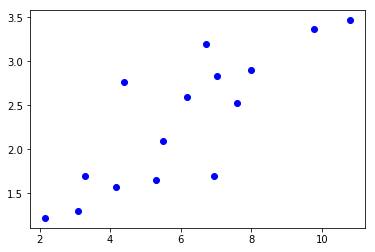

In [3]:
%matplotlib inline

plt.plot(x_train,y_train, 'bo')

# 3.把数据转换成TensorFlow的tensor形式

In [4]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

# 4.定义一个线性模型

In [5]:
w = tf.Variable(initial_value=tf.random_normal(shape=(),seed=2019), dtype=tf.float32,name='weight')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='biase')

with tf.variable_scope('Linear_Model'):
    y_pred = w * x + b

Instructions for updating:
Colocations handled automatically by placer.


注意tf.variable_scope()这个函数, 它是用来规定一个变量的区域的, 在这个with语句下定义的所有变量都在同一个变量域当中, 域名就是variable_scope()的参数.那么它有什么用呢?实际上, 所有变量域中的变量的名字都以域名为前缀:

In [6]:
print(w.name)
print(y_pred.name)

weight:0
Linear_Model/add:0


In [7]:
# 开启交互式会话
sess = tf.InteractiveSession()

# 初始化
sess.run(tf.global_variables_initializer())

# 5.查看模型

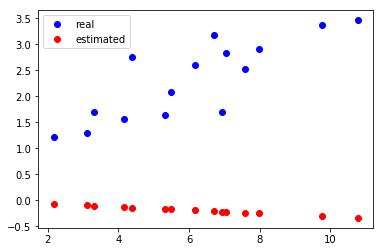

In [8]:
%matplotlib inline

# 要先将‘tensor’的内容‘fetch’出来
y_pred_numpy = y_pred.eval(session = sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

# 6.优化模型
## 定义误差函数
前面提到过, 为了优化我们的模型, 需要构建一个误差(loss)函数, 来告诉我们优化的好坏程度.而这里, 我们想要预测值和真实值尽可能接近,因此, 我们就用上面定义的loss进行衡量.

In [9]:
loss = tf.reduce_mean(tf.square(y - y_pred))

# 看看当前模型下的误差
print(loss.eval(session=sess))

6.962091


In [10]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print('w_grad: %.4f' % w_grad.eval(session=sess))
print('w_grad: %.4f' % b_grad.eval(session=sess))

w_grad: -33.7301
w_grad: -5.0289


对梯度乘上一个步⻓(lr)来更新参数.一般我们把这个步⻓称为学习率

In [11]:
lr = 1e-2

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

sess.run([w_update, b_update])

[0.3059657, 0.050288744]

在更新参数完成后, 我们再一次看看模型的输出结果

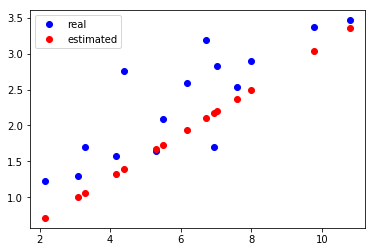

In [12]:
%matplotlib inline

# 要先将‘tensor’的内容‘fetch’出来
y_pred_numpy = y_pred.eval(session = sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

更新一次之后, 我们发现红色点跑到了蓝色点附近, 相比之前靠得更近了, 说明通过梯度下降模型得到了优化. 当然我们可以多更新几

<IPython.core.display.Javascript object>


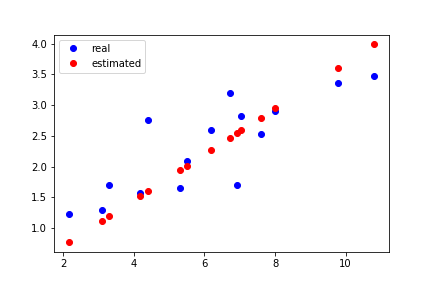

epoch: 0,loss: 0.37979334592819214
epoch: 1,loss: 0.25516536831855774
epoch: 2,loss: 0.2524365186691284
epoch: 3,loss: 0.25196573138237
epoch: 4,loss: 0.2515389323234558
epoch: 5,loss: 0.25111502408981323
epoch: 6,loss: 0.2506933808326721
epoch: 7,loss: 0.2502738833427429
epoch: 8,loss: 0.24985651671886444
epoch: 9,loss: 0.24944131076335907


<IPython.core.display.Javascript object>


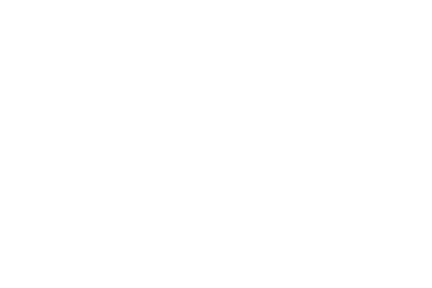

In [15]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update, b_update])
    
    y_pred_numpy = y_pred.eval(session=sess)
    loss_numpy = loss.eval(session=sess)
    
    ax.clear()
    ax.plot(x_train, y_train, 'bo', label='real')
    ax.plot(x_train, y_pred_numpy, 'ro', label='estimated')
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.5)
    
    print('epoch: {},loss: {}'.format(e,loss_numpy))

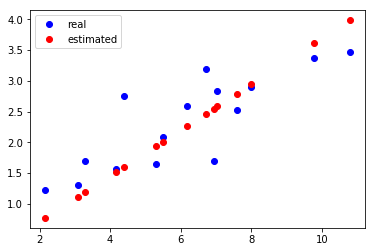

In [18]:
%matplotlib inline
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

In [19]:
sess.close()

# 多项式回归

In [20]:
# 将之前的‘graph’清除

tf.reset_default_graph()

In [21]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义函数
b_target = np.array([0.9]) #定义函数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 +{:.2f} * x^3'.format(
b_target[0], w_target[0], w_target[1], w_target[2])

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 +2.40 * x^3


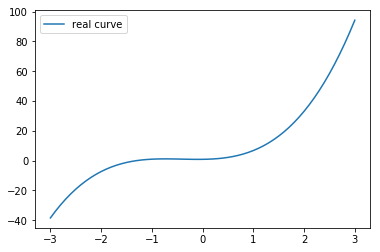

In [23]:
%matplotlib inline

# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample , label='real curve')
plt.legend()

In [26]:
x_train = np.stack([x_sample ** i for i in range(1,4)], axis=1)
x_train = tf.constant(x_train, dtype=tf.float32, name='x_train')
y_train = tf.constant(y_sample, dtype=tf.float32, name='y_train')

In [28]:
# 构造线性模型
w = tf.Variable(initial_value=tf.random_normal(shape=(3, 1), dtype=tf.float32, name='weights'))
b = tf.Variable(initial_value=0, dtype=tf.float32, name='bias')

def multi_linear(x):
    return tf.squeeze(tf.matmul(x, w) + b)

y_ = multi_linear(x_train)

In [29]:
sess = tf.InteractiveSession()

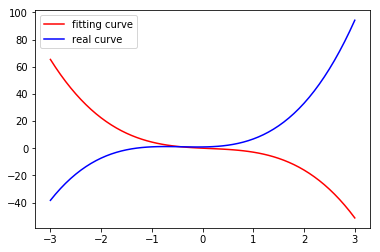

In [30]:
# 画出模型输出的结果和真实结果的对比

%matplotlib inline 

sess.run(tf.global_variables_initializer())

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()

In [31]:
# 定义loss函数
loss = tf.reduce_mean(tf.square(y_train - y_))
loss_numpy = sess.run(loss)
print(loss_numpy)

2642.1829


In [33]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print(w_grad.eval(session=sess))
print(b_grad.eval(session=sess))

[[ -164.94263]
 [  -82.43322]
 [-1080.1428 ]]
-15.57791


In [34]:
lr = 1e-3

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

Text(0.5, 1.0, 'loss: 1581.5219')

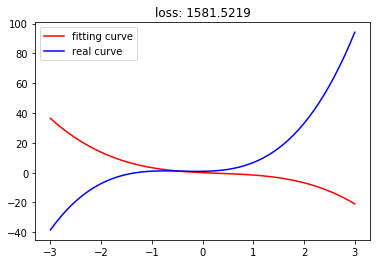

In [35]:
# 查看效果
%matplotlib inline 

sess.run([w_update, b_update])

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)
loss_numpy = loss.eval(session=sess)

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()
plt.title('loss: %.4f' % loss_numpy)

<IPython.core.display.Javascript object>


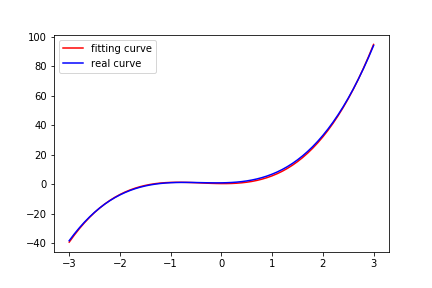

epoch: 20,loss: 16.026580810546875
epoch: 40,loss: 4.088437080383301
epoch: 60,loss: 1.2945653200149536
epoch: 80,loss: 0.62997967004776
epoch: 100,loss: 0.4627925753593445


<IPython.core.display.Javascript object>


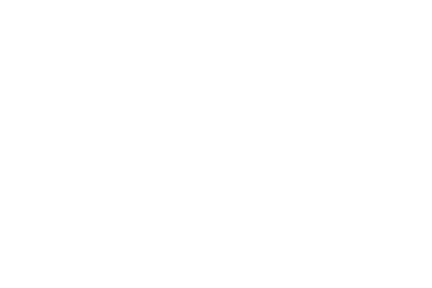

In [37]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(100):
    sess.run([w_update, b_update])
    
    x_train_value = x_train.eval(session=sess)
    y_train_value = y_train.eval(session=sess)
    y_pred_value = y_.eval(session=sess)
    loss_numpy = loss.eval(session=sess)
    
    ax.clear()
    ax.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
    ax.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.1)
    
    if(e + 1) % 20 == 0:
        print('epoch: {},loss: {}'.format(e + 1,loss_numpy))